Done


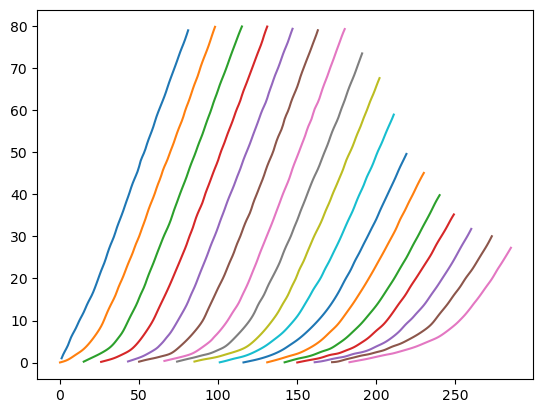

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

filename = "sovtek-6h30pi_plate_curves.csv"

# Assumes column 1 contains plate voltages and subsequent columns
# each contain Ia's for different Vg and are labeled "Ec=__V"

df_tube = pd.read_csv(filename)
df_tube = df_tube[df_tube["x"] >= 0] # eliminate x (Vp) values below 0
df_tube[df_tube < 0] = np.nan

# if df_tube["x"].min() > 0:
#     df_tube = pd.concat([df_tube, pd.DataFrame(np.zeros(len(df_tube.columns)), index=df_tube.columns).T], axis = 0, ignore_index=True)
#     df_tube.sort_values(by='x', inplace = True, ignore_index = True)

output_df = pd.DataFrame()
fig, ax = plt.subplots()

for column_idx in range(1, len(df_tube.columns)):
    columns = df_tube.iloc[:, [0, column_idx]][df_tube.iloc[:, [0, column_idx]].iloc[:, 1].notna()] # grabs 1st and column_idx columns, then filters out nans
    Vg = float(columns.keys()[1].replace("Ec=", "").replace("V", "")) * -1 if float(columns.keys()[1].replace("Ec=", "").replace("V", "")) < 0 else float(columns.keys()[1].replace("Ec=", "").replace("V", "")) # extracts Vg and inverts if < 0
    columns["Vg"] = np.full(np.shape(columns.iloc[:, -1].values), Vg)
    columns.rename(columns = {"x": "Vp", columns.keys()[1]: "Ia"}, inplace = True)
    ax.plot(columns["Vp"], columns["Ia"], label = f"Vg = {Vg:.1f} V")
    output_df = pd.concat([output_df, columns.sort_values(by='Vp')], axis = 0)

output_df.loc[:, ["Vp", "Vg", "Ia"]].to_csv(os.path.splitext(filename)[0] + "_2.csv", index=False)
print("Done")